In [41]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import json

import csv
import pickle

from pysal.esda.getisord import G_Local
from pysal.weights.weights import W
from sklearn.decomposition import PCA
from collections import defaultdict

### Processing subdivision_to_word_counts.tsv

In [3]:
word_list = set()
word_dict = defaultdict(dict)

with open('subdivision_to_word_counts.tsv', 'r') as file:
    reader = csv.reader(file, delimiter='\t')
    for line in reader:
        id_ = line[0]
        list_of_val = line[1].split()
        for a in range(int(len(list_of_val)/2)):
            loc_id = list_of_val[a*2]
            value = int(list_of_val[a*2+1])
            word_dict[id_][loc_id] = value
            word_list.add(loc_id)

word_list = sorted(word_list, reverse=False)

In [4]:
word_vec = {}

for key, value in word_dict.items():
    word_vec[key] = [value.get(word, 0) for word in word_list]

In [5]:
region2word = pd.DataFrame.from_dict(word_vec, columns=word_list, orient='index')

In [6]:
region2word.head()

a  a.m.  aa  aaa  aaron  ab  abandoned  abbey  abbotsford  abby  \
5915022  24074    14   7    4     20  25          8      5          23    11   
5919008    291     0   0    0      0   0          0      0           0     1   
3520005  97237    60  44   24    149  46         32     33           3    27   
4611040  18982     9   4   10     22  12          7      7           0     4   
3539036   7723     0   5    3      1   5          2      1           0     1   

         ...    zero  zimmerman  zip  zoe  zombie  zombies  zone  zoo  zoom  \
5915022  ...      60          3    8    7      34       18    47   15     6   
5919008  ...       1          0    0    0       0        0     1    1     0   
3520005  ...     190         31   30   24     120       70   232  333    21   
4611040  ...      40          2    6    5      27        5    43   97     4   
3539036  ...      12          1    2    2      14        7    19   11     0   

         zumba  
5915022      8  
5919008      0  
3520005     23  
4611040      7  
3539036      4  

[5 rows x 10000 columns]

### Processing subdivision_to_neighbors.tsv

In [7]:
region_set = set()
region_dict = {}

with open('subdivision-to-neighbors.tsv', 'r') as file:
    reader2 = csv.reader(file, delimiter='\t')
    i=0
    for line in reader2:
        id_ = line[0]
        adj = [x for x in line[1].split()]
        region_set |= set(adj)
        
        region_dict[id_] = adj

region_set = sorted(region_set)
region_set_ref = {value: key for key, value in enumerate(region_set)}
region_df_input = {}

for key, value in region_dict.items():
    array = np.zeros(len(region_set))
    
    for adj_region in value:
        array[region_set_ref[adj_region]] = 1
    
    region_df_input[key] = array

In [8]:
not_in_wordcounts = set(region_set).difference(set(region2word.index.values))
not_in_wordcounts = {x:list(np.zeros(len(region2word.columns))) for x in not_in_wordcounts}

### Full Dataframe

In [9]:
df2 = pd.DataFrame.from_dict(not_in_wordcounts, columns=word_list, orient='index')
region2word_full = region2word.append(df2)
region2word_full = region2word_full.sort_index()

In [10]:
region2word_full.head()

a  a.m.   aa  aaa  aaron   ab  abandoned  abbey  abbotsford  abby  \
1001101   0.0   0.0  0.0  0.0    0.0  0.0        0.0    0.0         0.0   0.0   
1001105   1.0   0.0  0.0  0.0    0.0  0.0        0.0    0.0         0.0   0.0   
1001113   3.0   0.0  0.0  0.0    0.0  0.0        0.0    0.0         0.0   0.0   
1001120   1.0   0.0  0.0  0.0    0.0  0.0        0.0    0.0         0.0   0.0   
1001124  22.0   0.0  0.0  0.0    0.0  0.0        0.0    0.0         0.0   0.0   

         ...    zero  zimmerman  zip  zoe  zombie  zombies  zone  zoo  zoom  \
1001101  ...     0.0        0.0  0.0  0.0     0.0      0.0   0.0  0.0   0.0   
1001105  ...     0.0        0.0  0.0  0.0     0.0      0.0   0.0  0.0   0.0   
1001113  ...     0.0        0.0  0.0  0.0     0.0      0.0   0.0  0.0   0.0   
1001120  ...     0.0        0.0  0.0  0.0     0.0      0.0   0.0  0.0   0.0   
1001124  ...     0.0        0.0  1.0  0.0     0.0      0.0   0.0  0.0   0.0   

         zumba  
1001101    0.0  
1001105    0.0  
1001113    0.0  
1001120    0.0  
1001124    0.0  

[5 rows x 10000 columns]

In [11]:
conv_dict = {}
for word in region2word_full.columns:
    conv_dict[word] = list(region2word_full[word])

In [12]:
weight_binary = W(region_dict, id_order=region2word_full.index.values)

In [13]:
for x in list(region2word_full.columns):
    print(x)

a
a.m.
aa
aaa
aaron
ab
abandoned
abbey
abbotsford
abby
abc
aberdeen
ability
able
aboard
aboriginal
abortion
about
above
abs
absence
absolute
absolutely
abt
abuse
ac
academic
academy
acadia
acc
accent
accents
accenture
accept
acceptable
acceptance
accepted
accepting
access
accessories
accident
accidentally
accidents
accomplish
accomplished
accomplishment
according
account
accountant
accountemps
accounting
accounts
accurate
accused
ace
ache
achieve
achieved
achievement
acid
acknowledge
acoustic
acquired
acres
across
act
acting
action
actions
active
activities
activity
actor
actors
actress
acts
actual
actually
ad
adam
adams
add
added
addict
addicted
addicting
addiction
addictive
adding
addition
address
adds
adelaide
adele
adidas
adjoint
admin
administration
administrative
administrator
admire
admission
admit
admitted
adopt
adopted
adorable
adore
adrenaline
adrian
ads
adult
adults
advance
advanced
advantage
adventure
adventures
advertising
advice
advil
advise
advisor
advisory
aerotek
af
af

confirmed
confirms
conflict
confuse
confused
confusing
confusion
congrats
congratulations
congress
connaught
connect
connected
connecting
connection
connections
connor
conquer
cons
conscious
consequences
conservation
conservative
conservatives
consider
considered
considering
consist
consistent
consists
console
conspiracy
constant
constantly
construction
consultant
consulting
consume
consumed
consumer
cont
contact
contacts
contain
container
contemplating
contemporary
content
contest
context
continue
continued
continues
continuing
contract
contracts
contribute
control
controller
controls
convenience
convenient
convention
conversation
conversations
convince
convinced
convincing
convo
convos
cook
cooke
cooked
cookie
cookies
cooking
cooks
cool
cooler
coolest
coop
cooper
coordinator
coordonnateur
coors
cop
cope
copies
copper
cops
copy
coquitlam
cora
cord
core
corey
corn
corner
corners
cornerstone
cornwall
corp
corporate
corporation
correct
correction
correctly
corrupt
corruption
cory
cos
cos

fortune
forum
forward
forâ€¦
foster
fought
foul
found
foundation
founder
fountain
four
fourth
fox
fr
frame
fran
france
franchise
francis
francisco
franco
frank
frankie
franklin
fraser
fraud
freak
freaked
freakin
freaking
freaks
freaky
fred
freddy
fredericton
free
freedom
freestyle
freeze
freezer
freezing
french
fresh
freshly
fri
frick
fricken
frickin
friday
fridays
fridge
fried
friend
friendly
friends
friendship
friendships
fries
frig
friggen
friggin
frills
fringe
frm
frog
from
fromâ€¦
front
frosh
frost
frosty
froze
frozen
fruit
fruits
frustrated
frustrating
frustration
fry
ft
ftw
fu
fuck
fucked
fucken
fucker
fuckers
fuckin
fucking
fuckk
fucks
fudge
fuel
fuk
fukin
full
full-time
fully
fun
function
functional
fund
funday
funding
fundraiser
fundraising
funds
funeral
funk
funky
funnier
funniest
funny
fuq
fur
furious
furniture
furry
further
fusion
future
fuzzy
fyi
g
g1
g2
ga
gaga
gah
gain
gained
gaining
gains
gal
gala
galaxy
gallagher
gallery
gals
gamble
game
gamer
games
gaming
gang
gangst

mascara
mascot
mashed
mask
mason
mass
massage
massey
massive
master
masterpiece
masters
mat
mata
match
matches
matching
mate
material
mates
math
matt
matter
matters
matthew
matthews
mattress
mature
max
maxwell
may
maya
maybe
mayo
mayor
mayoral
maze
mb
mc
mccartney
mccowan
mcdavid
mcdicks
mcdonald
mcdonalds
mcgill
mckenzie
mcmaster
mcmurray
me
meadows
meal
meals
mean
meaning
means
meant
meanwhile
measure
meat
meatballs
meats
mechanic
mechanical
med
medal
media
medical
medication
medicine
mediocre
meditation
medium
meds
mee
meee
meeee
meeeee
meek
meet
meeting
meetings
meets
meg
mega
megan
meh
mel
melissa
melo
melt
melted
melting
member
members
membership
meme
memo
memorable
memorial
memories
memory
memphis
men
menchie
menchies
mental
mentality
mentally
mention
mentioned
mentions
mentor
menu
meow
mercer
merch
merchandise
merchant
merci
mercy
mermaid
merry
mes
mess
message
messages
messaging
messed
messenger
messi
messing
messy
met
metal
metallica
metcalfe
meth
method
metro
metropolis
metr

pulls
pump
pumped
pumper-114
pumper-223
pumper-234
pumper-312
pumper-313
pumper-314
pumper-315
pumper-324
pumper-331
pumper-332
pumper-344
pumper-442
pumping
pumpkin
pumpkins
pumps
pun
punch
punched
punching
punishment
punk
pup
puppies
puppy
purchase
purchased
pure
purge
purple
purpose
purse
push
pushed
pushing
pussies
pussy
put
putin
puts
putting
puzzle
pvr
q
qa
qb
qc
quad
quality
quarry
quarter
quarters
quartier
quay
que
quebec
queen
queens
queensway
queer
quest
question
questionable
questioning
questions
qui
quick
quicker
quickly
quiet
quietly
quinn
quinoa
quit
quite
quitting
quiz
quote
quotes
quoting
quÃ©bec
r
r.i.p
rabbit
race
racer
races
rachel
racing
racism
racist
rack
rad
radar
radio
rae
rage
raging
raiders
rail
railway
rain
rainbow
raining
rains
rainy
raise
raised
raises
raising
rally
ralph
ram
ramen
ramp
ran
ranch
random
randomly
randy
range
ranger
rangers
rank
ranked
rant
rap
rape
raped
rapidly
rapper
rappers
rapping
raps
raptors
rare
rarely
raspberry
rat
ratchet
rate
rated


throwing
thrown
throws
thru
tht
thu
thug
thumb
thumbs
thunder
thunderstorm
thunderstorms
thurs
thursday
thursdays
thus
thx
thy
ti
ticket
tickets
tickle
tide
tie
tied
ties
tiff
tiffany
tiger
tigers
tight
tights
til
tile
till
tim
timberlake
time
timeline
times
timing
timmies
timmy
timothy
tims
tin
tina
tinder
ting
tings
tiny
tip
tips
tipsy
tire
tired
tires
tiring
tis
titanic
title
titles
tits
titties
tix
tjx
tks
tl
tlc
tm
tmr
tmrw
tmw
tn
to
toast
toasted
toaster
toby
today
todays
todd
toddler
toe
toes
toews
tofino
tofu
together
toi
toilet
tokyo
told
tolerance
toll
tom
tomato
tomatoes
tommorow
tommy
tomorow
tomorrow
tomorrows
ton
tone
tongue
tonight
tonights
tonite
tons
tony
too
took
tool
tools
tooo
toooo
tooooo
tooth
top
top20
topic
topics
topped
tops
torn
tornado
toronto
torontoâ€¦
torres
torture
tory
toss
tossed
total
totally
touch
touchdown
touched
touches
touching
tough
tour
touring
tourism
tourist
tournament
tourney
tours
tow
toward
towards
towel
tower
towers
town
towne
townhouse
to

### Mapping function

In [14]:
canada_df = gpd.GeoDataFrame.from_file("gcsd000b11a_e.shp")

In [15]:
del df2, region2word, region_set, region_dict, word_list,\
word_dict, file, reader, line, id_, list_of_val, not_in_wordcounts, loc_id,\
region_set_ref, region_df_input, array, adj_region

In [16]:
def G_local2map(string, weight, p):
    result = pd.DataFrame(region2word_full.index.values, columns=['CSDUID'])
    result.CSDUID = result.CSDUID.astype(object)
    
    test = G_Local(region2word_full[string], weight, permutations=p)
    result['color_value'] = test.z_sim
    
    mapping = canada_df.merge(result, on='CSDUID')
    g = mapping.to_crs('+proj=lcc +lat_1=49 +lat_2=77 +lon_0=-91.52 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"').plot(column='color_value', vmin=-3, vmax=3, cmap='seismic', figsize=(12, 12))

### Testing G_local

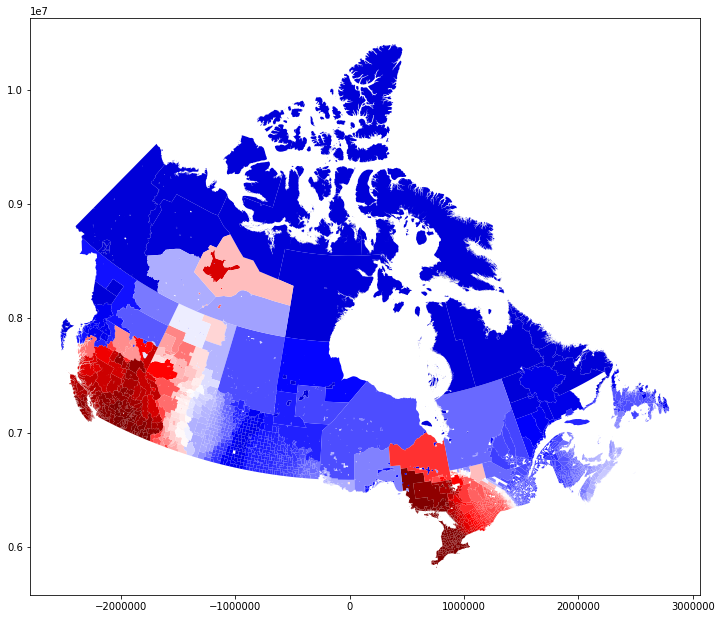

In [17]:
G_local2map('snowboarding', weight_binary, 999)

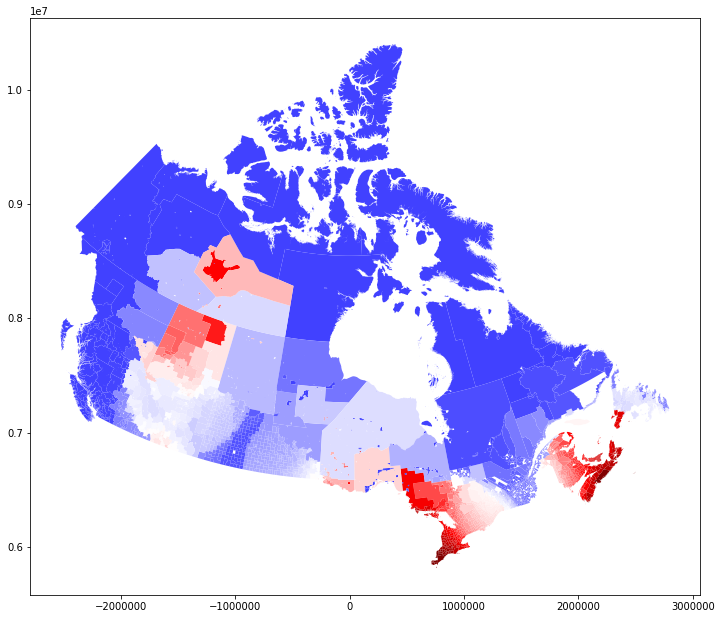

In [18]:
G_local2map('sobeys', weight_binary, 999)

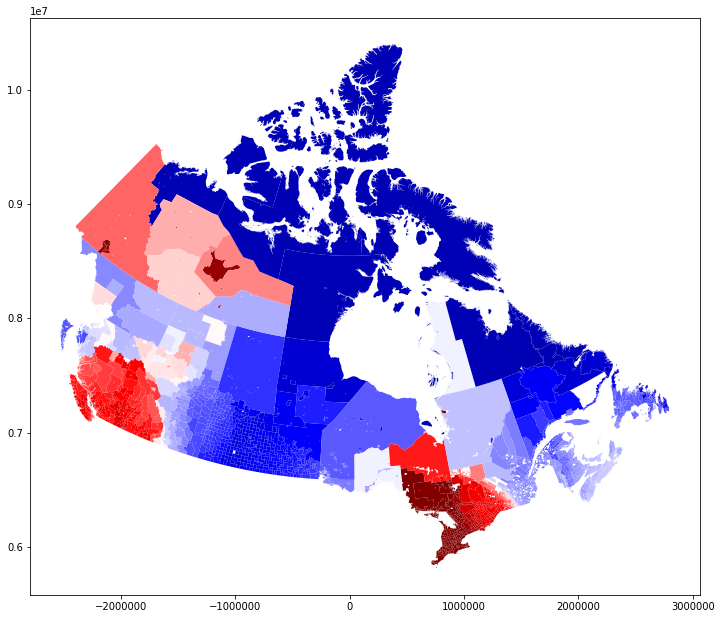

In [20]:
G_local2map('motel', weight_binary, 999)

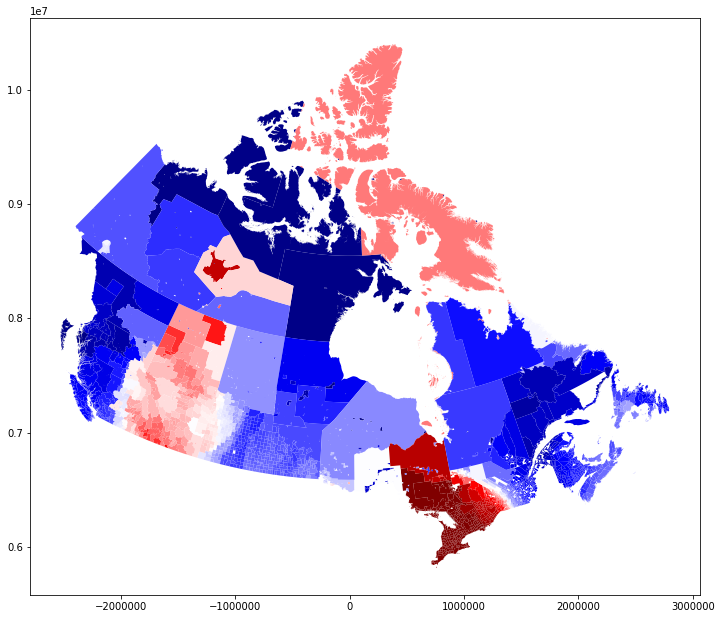

In [21]:
G_local2map('tractor', weight_binary, 999)

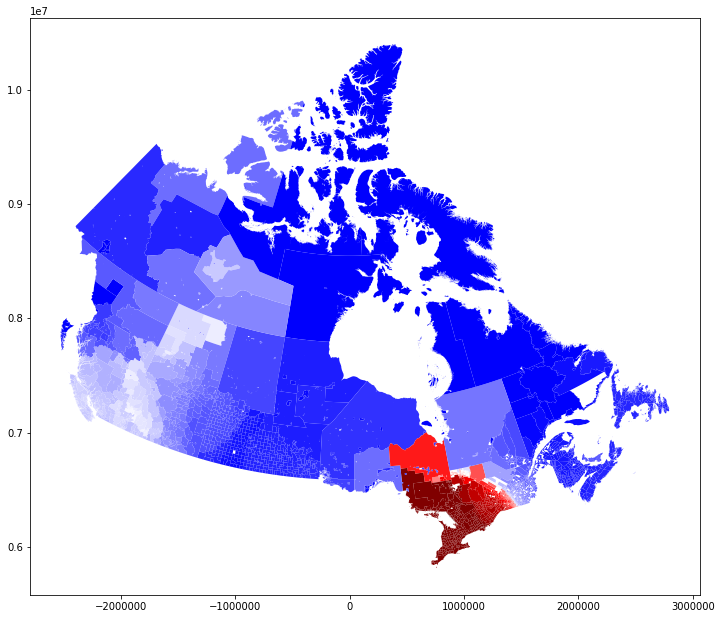

In [22]:
G_local2map('timmies', weight_binary, 999)

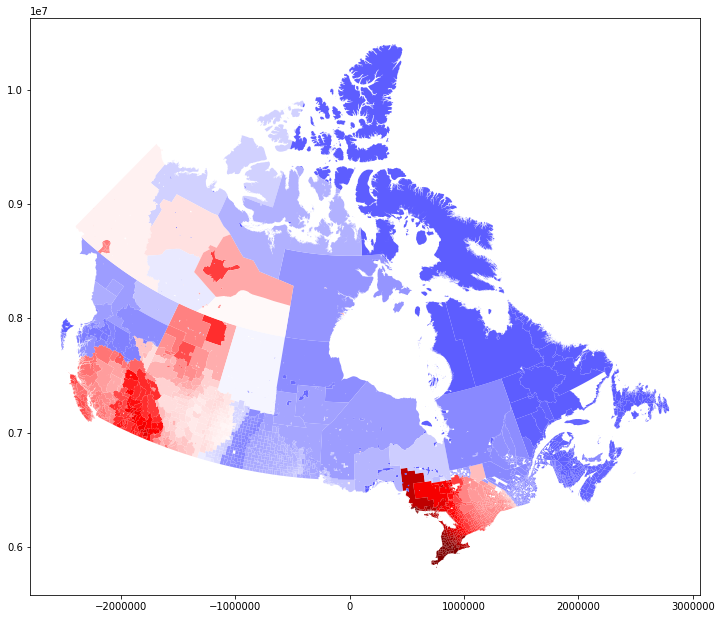

In [23]:
G_local2map('philippines', weight_binary, 999)

### PCA

In [49]:
region2word_full.index.values

array(['1001101', '1001105', '1001113', ..., '6208081', '6208087',
       '6208098'], dtype=object)

In [47]:
results = {}

with open('getis_result.csv', 'r') as file:
    reader = csv.reader(file, delimiter = '\t')
    i = 0 
    for line in reader:
        i+= 1
        if i % 6 == 1:
            word = ''.join(line)
        if i % 6 == 5:
            z_val = [float(x) for x in line]
            if len(z_val) != 4240:
                print('...')
        if i % 6 == 0:
            results[word] = z_val
            word = ''
            z_val = []

dict_keys(['a', 'a.m.', 'aa', 'aaa', 'aaron', 'ab', 'abandoned', 'abbey', 'abbotsford', 'abby', 'abc', 'aberdeen', 'ability', 'able', 'aboard', 'aboriginal', 'abortion', 'about', 'above', 'abs', 'absence', 'absolute', 'absolutely', 'abt', 'abuse', 'ac', 'academic', 'academy', 'acadia', 'acc', 'accent', 'accents', 'accenture', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accessories', 'accident', 'accidentally', 'accidents', 'accomplish', 'accomplished', 'accomplishment', 'according', 'account', 'accountant', 'accountemps', 'accounting', 'accounts', 'accurate', 'accused', 'ace', 'ache', 'achieve', 'achieved', 'achievement', 'acid', 'acknowledge', 'acoustic', 'acquired', 'acres', 'across', 'act', 'acting', 'action', 'actions', 'active', 'activities', 'activity', 'actor', 'actors', 'actress', 'acts', 'actual', 'actually', 'ad', 'adam', 'adams', 'add', 'added', 'addict', 'addicted', 'addicting', 'addiction', 'addictive', 'adding', 'addition', 'address', 'adds',

In [53]:
whole_wordlist = pd.DataFrame(data=results, index=region2word_full.index.values)
whole_wordlist.head()

a      a.m.        aa       aaa     aaron        ab  \
1001101 -1.034176 -0.734919 -1.077204 -0.927315 -1.077889 -0.652802   
1001105 -1.151451 -0.790670 -1.151553 -1.039194 -1.103329 -0.652790   
1001113 -1.034174 -0.734919 -1.077204 -0.927315 -1.077889 -0.652802   
1001120 -1.031672 -0.733680 -1.076115 -0.923962 -1.076508 -0.652794   
1001124 -1.158588 -0.794322 -1.153961 -1.050310 -1.108561 -0.652825   

         abandoned     abbey  abbotsford      abby    ...         zero  \
1001101  -0.657499 -0.692177    -0.28862 -0.954788    ...    -1.013549   
1001105  -0.907067 -0.837734    -0.28862 -1.134664    ...    -1.127927   
1001113  -0.657499 -0.692177    -0.28862 -0.954788    ...    -1.013549   
1001120  -0.651953 -0.690045    -0.28862 -0.951475    ...    -1.010861   
1001124  -0.923414 -0.842448    -0.28862 -1.143451    ...    -1.136058   

         zimmerman       zip       zoe    zombie   zombies      zone  \
1001101  -0.945022 -1.116344 -1.095719 -0.978321 -1.240834 -1.103926   
1001105  -1.056084 -1.113924 -1.219743 -1.127761 -1.344721 -1.149248   
1001113  -0.945022 -1.116344 -1.095719 -0.978321 -1.240834 -1.103926   
1001120  -0.943395 -1.114736 -1.094820 -0.975455 -1.238921 -1.101466   
1001124  -1.059681 -1.119844 -1.219743 -1.135557 -1.349796 -1.158570   

              zoo      zoom     zumba  
1001101 -0.740881 -1.022252 -1.162149  
1001105 -0.740768 -1.019694 -1.159552  
1001113 -0.740881 -1.022252 -1.162149  
1001120 -0.740806 -1.020552 -1.160424  
1001124 -0.741098 -1.027206 -1.167179  

[5 rows x 10000 columns]

In [111]:
pca = PCA(n_components=8)
components = pca.fit_transform(whole_wordlist)

In [120]:
component_df = pd.DataFrame(components, columns=['Component {}'.format(x+1) for x in range(components.shape[1])], index=region2word_full.index.values)

In [121]:
component_df.head()

Component 1  Component 2  Component 3  Component 4  Component 5  \
1001101   -83.812378    -0.596820     1.979143    -7.705477   -12.840911   
1001105   -94.055790    -0.501858     2.308414    -7.508674   -11.702813   
1001113   -83.812351    -0.596822     1.979153    -7.705542   -12.841031   
1001120   -83.592512    -0.598938     1.970608    -7.707197   -12.840306   
1001124   -94.663417    -0.495932     2.333449    -7.501668   -11.729637   

         Component 6  Component 7  Component 8  
1001101     0.197037     1.728697    -5.613504  
1001105     0.279473     1.865341    -5.401146  
1001113     0.197042     1.728755    -5.613659  
1001120     0.195726     1.729387    -5.606005  
1001124     0.282663     1.858235    -5.416959

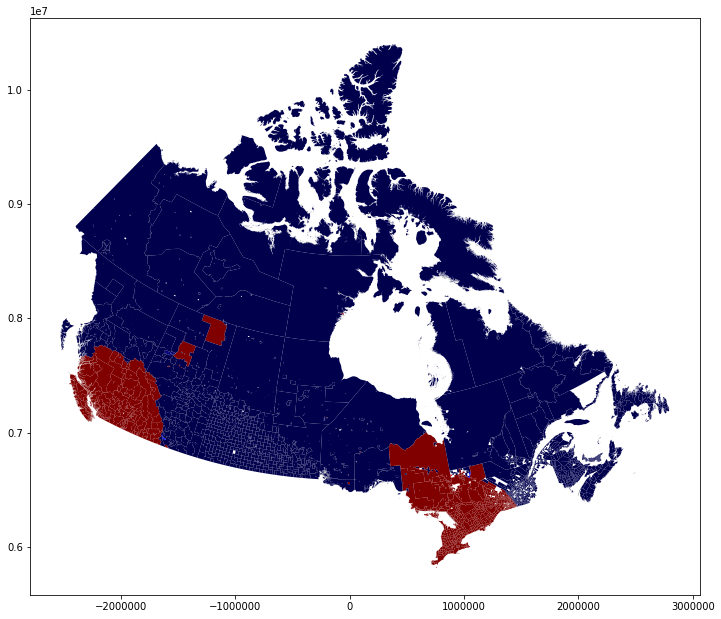

In [122]:
comp1_df = component_df[['Component 1']].reset_index()
comp1_df.columns = ['CSDUID', 'color_value']
comp1_df.CSDUID = comp1_df.CSDUID.astype(object)

mapping_comp1 = canada_df.merge(comp1_df, on='CSDUID')
g = mapping_comp1.to_crs('+proj=lcc +lat_1=49 +lat_2=77 +lon_0=-91.52 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"').plot(column='color_value', vmin=-3, vmax=3, cmap='seismic', figsize=(12, 12))

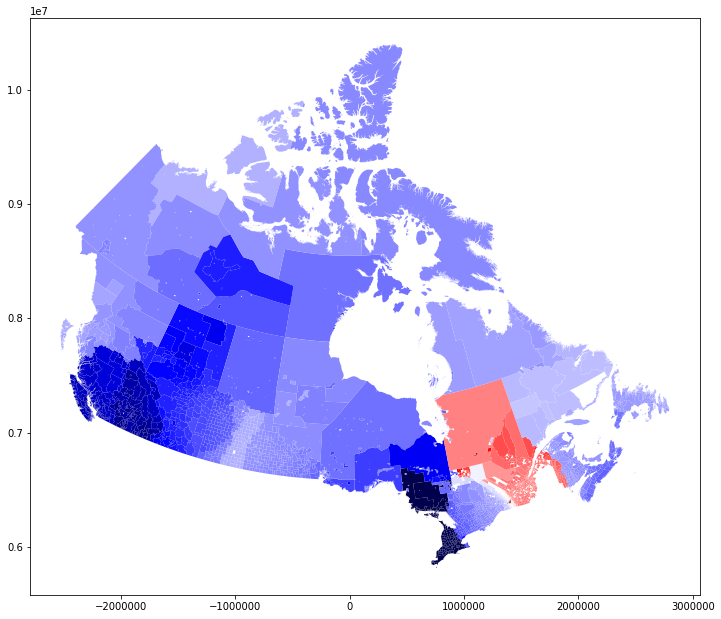

In [123]:
comp2_df = component_df[['Component 2']].reset_index()
comp2_df.columns = ['CSDUID', 'color_value']
comp2_df.CSDUID = comp2_df.CSDUID.astype(object)

mapping_comp2 = canada_df.merge(comp2_df, on='CSDUID')
g = mapping_comp2.to_crs('+proj=lcc +lat_1=49 +lat_2=77 +lon_0=-91.52 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"').plot(column='color_value', vmin=-3, vmax=3, cmap='seismic', figsize=(12, 12))

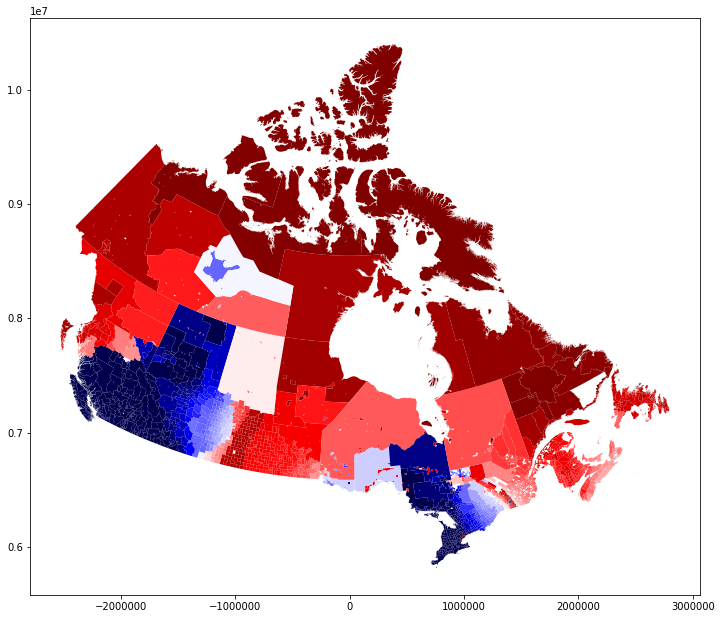

In [124]:
comp3_df = component_df[['Component 3']].reset_index()
comp3_df.columns = ['CSDUID', 'color_value']
comp3_df.CSDUID = comp1_df.CSDUID.astype(object)

mapping_comp3 = canada_df.merge(comp3_df, on='CSDUID')
g = mapping_comp3.to_crs('+proj=lcc +lat_1=49 +lat_2=77 +lon_0=-91.52 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs"').plot(column='color_value', vmin=-3, vmax=3, cmap='seismic', figsize=(12, 12))

### PCA Component Analysis

In [125]:
pca_analysis_df = pd.DataFrame(data=pca.components_, columns = whole_wordlist.columns)
pca_analysis_df

a      a.m.        aa       aaa     aaron        ab  abandoned  \
0  1.130208e-02  0.007789  0.010913  0.007311  0.011349 -0.000422   0.010315   
1 -9.797115e-05 -0.000018 -0.000021 -0.000048 -0.000015 -0.000312  -0.000205   
2 -4.664520e-04 -0.000259  0.000098 -0.000916  0.000072 -0.001958  -0.001080   
3  6.806584e-07 -0.001230 -0.000655 -0.005607  0.014565 -0.003379  -0.000611   
4  4.866887e-04  0.001346 -0.006415  0.007760 -0.003895  0.023576   0.006841   
5 -8.465055e-05 -0.000076 -0.000270 -0.000126 -0.000956  0.000960   0.000076   
6 -2.989987e-05 -0.000381 -0.000033  0.003560  0.014886  0.004958   0.004212   
7  3.576464e-04  0.004591  0.005047  0.006744 -0.003252  0.079634   0.017708   

      abbey  abbotsford      abby       abc  aberdeen   ability      able  \
0  0.008210    0.000815  0.009419  0.009459  0.003150  0.010118  0.012149   
1 -0.000237   -0.000193 -0.000246  0.000025 -0.000252 -0.000123 -0.000105   
2 -0.000231   -0.002273 -0.002013 -0.000842 -0.002517 -0.000508 -0.000287   
3  0.010113   -0.005550 -0.003043 -0.004537 -0.004930  0.000250 -0.000568   
4  0.000040    0.029617  0.020669  0.006754  0.031393  0.002638 -0.003548   
5  0.000408    0.000703  0.000239 -0.000256  0.000764  0.000091 -0.000155   
6  0.011862   -0.001154  0.001933  0.000330 -0.000295 -0.000857 -0.000205   
7 -0.006863   -0.018805 -0.022445 -0.010104 -0.021286  0.004468  0.001090   

     aboard  aboriginal  abortion     about     above       abs   absence  \
0  0.008326    0.004659  0.007121  0.012229  0.010167  0.013138  0.007818   
1 -0.000160   -0.000181 -0.000206 -0.000091 -0.000116 -0.000083 -0.000015   
2 -0.000516   -0.001702 -0.000782 -0.000308 -0.000790 -0.000355 -0.000114   
3  0.022179   -0.003033 -0.004437 -0.000559  0.001463 -0.000918 -0.001970   
4  0.007736    0.019010  0.004995 -0.002172  0.006158 -0.001816  0.000087   
5  0.000033    0.000544  0.000131 -0.000132  0.000115 -0.000186 -0.000175   
6 -0.004486   -0.001870  0.001684 -0.000600 -0.002488 -0.001715 -0.000129   
7 -0.002398    0.001829  0.001753  0.001158  0.000045 -0.003384 -0.004390   

   absolute  absolutely       abt     abuse        ac  academic       academy  \
0  0.012190    0.011849  0.008395  0.011803  0.010456  0.010730  7.290309e-03   
1 -0.000101   -0.000147  0.000082 -0.000169 -0.000135 -0.000179 -8.226889e-07   
2 -0.000230   -0.000641  0.000254 -0.000293  0.000540 -0.000895  4.898235e-04   
3 -0.000045   -0.002179 -0.000488 -0.000671  0.022950 -0.002430  7.694278e-04   
4 -0.004153    0.001260 -0.002951 -0.003268 -0.011161  0.004238 -1.558922e-03   
5 -0.000036    0.000033 -0.000467 -0.000026 -0.000747  0.000221 -7.668831e-05   
6 -0.000627   -0.000181  0.000332 -0.001880 -0.001078 -0.001734 -1.815818e-03   
7  0.004471    0.001011  0.002927 -0.000638  0.002800 -0.004504 -2.114908e-03   

     acadia       acc    accent   accents  accenture    accept  acceptable  \
0 -0.000520  0.007925  0.010759  0.010907   0.005562  0.011502    0.013073   
1 -0.000161 -0.000017  0.000012 -0.000051   0.000230 -0.000042   -0.000125   
2 -0.000698  0.001112  0.000002 -0.000089   0.000913 -0.000188   -0.000382   
3 -0.005255  0.001879 -0.000236 -0.001337  -0.000071  0.000099   -0.002528   
4  0.006678 -0.010114 -0.004467 -0.002532  -0.006878 -0.003336   -0.004503   
5  0.000235 -0.000189 -0.000340 -0.000215  -0.000552 -0.000334   -0.000052   
6  0.003479 -0.001825 -0.000322 -0.002730   0.000078  0.000285    0.000569   
7  0.011248 -0.000208  0.003967 -0.001392  -0.007211 -0.001568   -0.000998   

   acceptance  accepted  accepting    access  accessories  accident  \
0    0.011590  0.013199   0.011712  0.009375     0.009234  0.006962   
1   -0.000102 -0.000024  -0.000208 -0.000062    -0.000042 -0.000015   
2   -0.000652  0.000417  -0.001161 -0.000140    -0.001372  0.000580   
3   -0.001312  0.000919  -0.003982  0.003363    -0.004622  0.001557   
4    0.000768 -0.010596   0.006771 -0.000952     0.012757 -0.004960   
5    0.000145 -0.000308   0.000222 -0.000172  

In [126]:
transposed = pca_analysis_df.T
transposed.head()

0         1         2             3         4         5  \
a      0.011302 -0.000098 -0.000466  6.806584e-07  0.000487 -0.000085   
a.m.   0.007789 -0.000018 -0.000259 -1.229840e-03  0.001346 -0.000076   
aa     0.010913 -0.000021  0.000098 -6.545027e-04 -0.006415 -0.000270   
aaa    0.007311 -0.000048 -0.000916 -5.606945e-03  0.007760 -0.000126   
aaron  0.011349 -0.000015  0.000072  1.456474e-02 -0.003895 -0.000956   

              6         7  
a     -0.000030  0.000358  
a.m.  -0.000381  0.004591  
aa    -0.000033  0.005047  
aaa    0.003560  0.006744  
aaron  0.014886 -0.003252

In [132]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.6f' % x):
    display(transposed[0].sort_values(ascending=False))

cottage                           0.022557
g2                                0.022527
conservation                      0.020662
von                               0.020478
hangout                           0.019403
friggen                           0.019402
chirp                             0.018988
aloud                             0.018592
highschool                        0.018108
chirping                          0.017860
gunna                             0.017489
timmies                           0.017356
fishing                           0.017338
g1                                0.017298
tn                                0.017072
boyfriends                        0.017036
dock                              0.016901
golf                              0.016676
golfing                           0.016676
defiantly                         0.016675
driveway                          0.016672
farm                              0.016635
tractor                           0.016583
probs      

In [131]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.6f' % x):
    display(transposed[1].sort_values(ascending=False))

stationnement                     0.985343
saint-denis                       0.129744
faillon                           0.077675
sainte-catherine                  0.068582
disponible                        0.026829
duluth                            0.017670
saint-laurent                     0.011777
boyer                             0.008037
mont-royal                        0.003312
vieux-port                        0.003302
banque                            0.002499
montrÃ©al                         0.002056
nautilus                          0.001906
stade                             0.001840
metcalfe                          0.001815
mcgill                            0.001664
stm                               0.001556
rue                               0.001362
quartier                          0.001342
lac                               0.001339
parc                              0.001337
montreal                          0.001253
marchÃ©                           0.001241
plateau    

In [130]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.float_format', lambda x: '%.6f' % x):
    display(transposed[2].sort_values(ascending=False))

grass/rubbish                     0.700135
sherbourne                        0.345332
commercial/industrial             0.274632
trl                               0.210386
hr332                             0.189917
rescue-pumper-426                 0.189776
shuter                            0.170456
b/w                               0.155165
pumper-324                        0.130642
p332                              0.128742
bellwoods                         0.121071
seizures/convulsions              0.117945
c33                               0.104467
yonge-dundas                      0.101817
ytz                               0.086509
vsa                               0.070292
c31                               0.062154
ossington                         0.051328
etobicoke                         0.049734
tems                              0.049422
highrise                          0.049116
pumper-332                        0.047881
wellesley                         0.047822
unconscious